# Project 1: NASA's hazardous objects

DART was the first-ever mission dedicated to investigating and demonstrating one method of asteroid deflection by changing an asteroid’s motion in space through kinetic impact... NASA’s Double Asteroid Redirection Test (DART) investigation team shows the spacecraft’s kinetic impact with its target asteroid, Dimorphos, successfully altered the asteroid’s orbit. This marks humanity’s first time purposely changing the motion of a celestial object and the first full-scale demonstration of asteroid deflection technology.

Potentially Hazardous Asteroids (PHAs) are currently defined based on parameters that measure the asteroid’s potential to make threatening close approaches to the Earth. Specifically, all asteroids with a minimum orbit intersection distance (MOID) of 0.05 au or less and an absolute magnitude (H) of 22.0 or less are considered PHAs (Jet Propulsion Laboratory, NASA).

An astronomical unit is the average distance between the Earth and the Sun, meaning 0.05 au 7.5 million Km.

The Absolute Magnitude is a measure of the apparent size of an asteroid or comet based on the luminosity of the celestial body on an inverse logarithmic scale, i.e., Venus has a magnitude of -5, Jupiter has a luminosity of -3, Pluton has a magnitude of 14, meanwhile, the Near-Earth Objects (NEOs) have a magnitude above 22.

Null Hypothesis (H0):
There is no correlation between the distance of Near-Earth Objects (NEOs) from Earth and their apparent size. The danger presented by the NEOs, as observed from Earth, is not influenced entirely by their distance or apparent size.

Hypothesis:
There is a correlation between the distance of Near-Earth Objects (NEOs) and their size. We expect to find a positive correlation between the distance of NEOs and their apparent size, indicating that NEOs in closer proximity to Earth will appear larger in the sky when observed from our vantage point, and therefore will be a potentially hazardous object.

To work on our hypothesis, we will be focusing on objects with a proximity equal to or less than 0.05 au and a magnitude below 22.

In [1]:
# Dependencies
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as st 
import csv 

In [2]:
# Data files
objects_path = "./neo_v2.csv"


# Read the data 
objects_data = pd.read_csv(objects_path)
objects_data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [3]:
n = objects_data['id'].nunique()
n

27423

In [4]:
unique_df = objects_data.groupby(by = 'id')['miss_distance'].min().reset_index()
unique_df.head()
x = unique_df['id'].nunique()

In [5]:
unique_objects_df = pd.merge(unique_df, objects_data, how = 'inner', on = ['id', 'miss_distance'])
unique_objects_df

,id,miss_distance,name,est_diameter_min,est_diameter_max,relative_velocity,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2000433,2.672952e+07,433 Eros (A898 PA),23.043847,51.527608,21402.705247,Earth,False,10.310,False
1,2000719,4.258288e+07,719 Albert (A911 TB),2.044349,4.571303,27551.597194,Earth,False,15.570,False
2,2001036,5.372124e+07,1036 Ganymed (A924 UB),37.892650,84.730541,51496.923293,Earth,False,9.230,False
3,2001566,8.053782e+06,1566 Icarus (1949 MA),1.427431,3.191832,108801.296374,Earth,False,16.350,True
4,2001580,3.557394e+07,1580 Betulia (1950 KA),3.065879,6.855513,105157.775851,Earth,False,14.690,False
...,...,...,...,...,...,...,...,...,...,...
27418,54275849,2.211065e+07,(2022 GL5),0.199965,0.447136,97087.784087,Earth,False,20.618,False
27419,54275852,1.781882e+07,(2022 GO5),0.045264,0.101214,27826.213807,Earth,False,23.844,False
27420,54275853,9.777491e+06,(2022 GP5),0.056022,0.125268,42604.694355,Earth,False,23.381,False
27421,54275865,1.895127e+04,(2022 GQ5),0.001227,0.002744,51054.089177,Earth,False,31.678,False


In [6]:
unique_objects_df.drop(columns = ['orbiting_body', 'sentry_object'], inplace = True)
unique_objects_df.to_csv("./unique_objects.csv", index_label="index")

### Statistics

In [7]:
miss_s = unique_objects_df['miss_distance'].agg(['mean', 'median', 'var', 'std', 'sem'])
miss_s

mean      1.770540e+07
median    1.145114e+07
var       2.972905e+14
std       1.724212e+07
sem       1.041197e+05
Name: miss_distance, dtype: float64

In [8]:
magnitude_s = unique_objects_df['absolute_magnitude'].agg(['mean', 'median', 'var', 'std', 'sem'])
magnitude_s

mean      23.361668
median    23.600000
var        8.236446
std        2.869921
sem        0.017331
Name: absolute_magnitude, dtype: float64

In [9]:
summary_df = pd.DataFrame({
    'miss_distance' : miss_s,
    'absolute_magnitude' : magnitude_s,
})
summary_df

,miss_distance,absolute_magnitude
mean,1.770540e+07,23.361668
median,1.145114e+07,23.600000
var,2.972905e+14,8.236446
std,1.724212e+07,2.869921
sem,1.041197e+05,0.017331


### Graphs

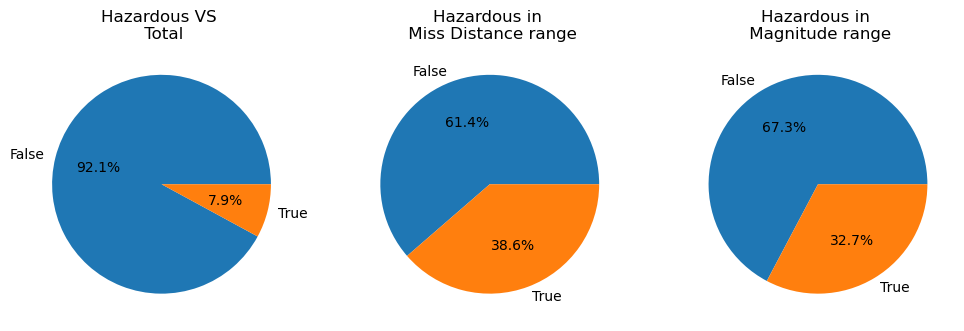

In [10]:
hazardous = unique_objects_df['hazardous'].value_counts()

distance_true = unique_objects_df[unique_objects_df['miss_distance'] <= 7500000].value_counts()
distance_false = unique_objects_df[unique_objects_df['miss_distance'] >= 7500000].value_counts()

dist_true_len = len(distance_true)
dist_false_len = len(distance_false)
distance = [dist_false_len, dist_true_len]

magnitude_true = unique_objects_df[unique_objects_df['absolute_magnitude'] <= 22].value_counts()
magnitude_false = unique_objects_df[unique_objects_df['absolute_magnitude'] >= 22].value_counts()

mag_true_len = len(magnitude_true)
mag_false_len = len(magnitude_false)
magnitude = [mag_false_len, mag_true_len]


labeling = ['False', 'True']
pct = '%1.1f%%'
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))
#hazardous.plot.pie(autopct = '%1.1f%%')
ax1.pie(hazardous, labels = labeling, autopct = pct)
ax1.set_title('Hazardous VS \n Total')
ax2.pie(distance, labels = labeling, autopct = pct)
ax2.set_title('Hazardous in \n Miss Distance range')
ax3.pie(magnitude, labels = labeling, autopct = pct)
ax3.set_title('Hazardous in \n Magnitude range')
plt.show()

In [11]:
hazardous_df = unique_objects_df[unique_objects_df['hazardous'] == True].reset_index(drop=True)

closest = hazardous_df.nsmallest(10, 'miss_distance')
closest

,id,miss_distance,name,est_diameter_min,est_diameter_max,relative_velocity,absolute_magnitude,hazardous
1777,3789399,143272.707499,(2017 VW13),0.192555,0.430566,40792.770407,20.70,True
324,2308635,324930.657662,308635 (2005 YU55),0.124324,0.277997,49379.390941,21.65,True
762,2612901,432438.389028,612901 (2004 XP14),0.291444,0.651688,62664.322601,19.80,True
956,3263453,432438.418948,(2004 XP14),0.350393,0.783502,62664.322585,19.40,True
1572,3729835,486807.131877,(2015 TB145),0.260949,0.583499,125807.719190,20.04,True
2091,54161861,518534.386699,(2021 MK1),0.144729,0.323623,38017.458288,21.32,True
868,3131063,526974.354449,(2002 NY40),0.421265,0.941976,75226.687788,19.00,True
1072,3388315,554168.778850,(2007 TU24),0.231502,0.517654,33294.250592,20.30,True
1268,3564590,624155.584206,(2011 JA),0.146068,0.326618,81864.415828,21.30,True
838,3102719,832144.928659,(2001 YB5),0.175612,0.392681,110118.237589,20.90,True


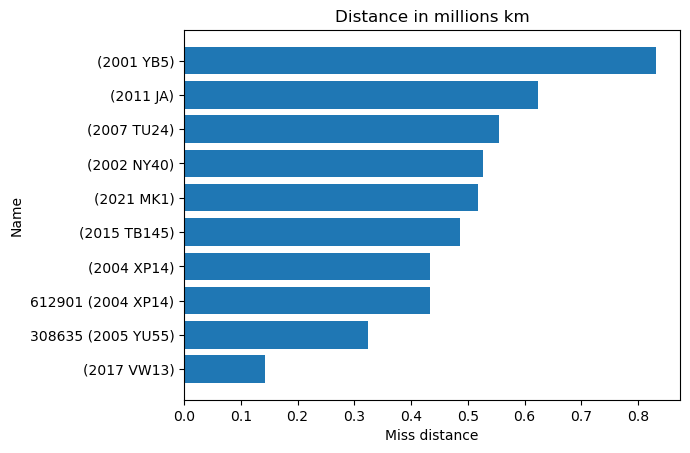

In [12]:
plt.barh(closest['name'], closest['miss_distance'] / 1000000)
plt.xlabel('Miss distance')
plt.ylabel('Name')
plt.title('Distance in millions km')
plt.show()

In [13]:
hazardous_df = unique_objects_df[unique_objects_df['hazardous'] == True].reset_index(drop=True)

brigthest = hazardous_df.nsmallest(10, 'absolute_magnitude')
brigthest

,id,miss_distance,name,est_diameter_min,est_diameter_max,relative_velocity,absolute_magnitude,hazardous
8,2003122,7.066521e+06,3122 Florence (1981 ET3),4.135757,9.247833,48724.636424,14.04,True
16,2004183,1.822481e+07,4183 Cuno (1959 LM),3.967848,8.872377,51827.192086,14.13,True
9,2003200,1.031203e+07,3200 Phaethon (1983 TB),3.503926,7.835018,114797.864507,14.40,True
44,2016960,3.847356e+07,16960 (1998 QS52),3.439973,7.692012,103209.942960,14.44,True
273,2242450,2.441048e+07,242450 (2004 QY2),2.954983,6.607543,96045.735019,14.77,True
96,2089830,6.350303e+07,89830 (2002 CE),2.682594,5.998463,101571.176418,14.98,True
22,2004953,1.598166e+07,4953 (1990 MU),2.633631,5.888979,84339.115906,15.02,True
114,2137427,6.216949e+07,137427 (1999 TF211),2.457848,5.495915,105547.369460,15.17,True
3,2001981,1.339977e+07,1981 Midas (1973 EA),2.401900,5.370812,95427.601890,15.22,True
6,2002201,5.533405e+07,2201 Oljato (1947 XC),2.368945,5.297122,69559.721293,15.25,True


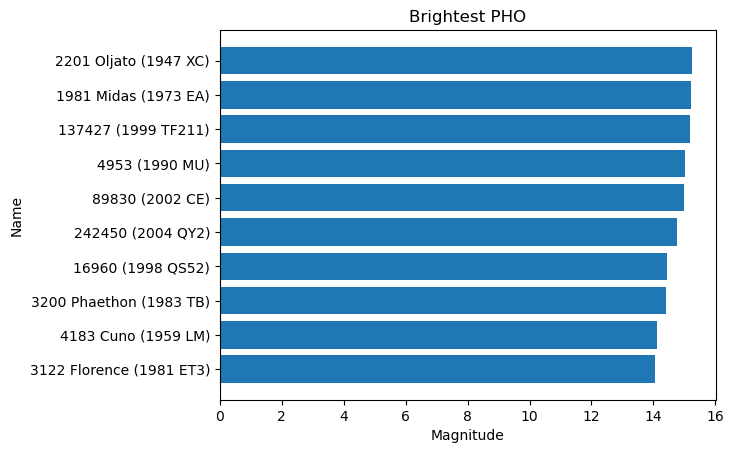

In [14]:
plt.barh(brigthest['name'], brigthest['absolute_magnitude'])
plt.xlabel('Magnitude')
plt.ylabel('Name')
plt.title('Brightest PHO')
plt.show()

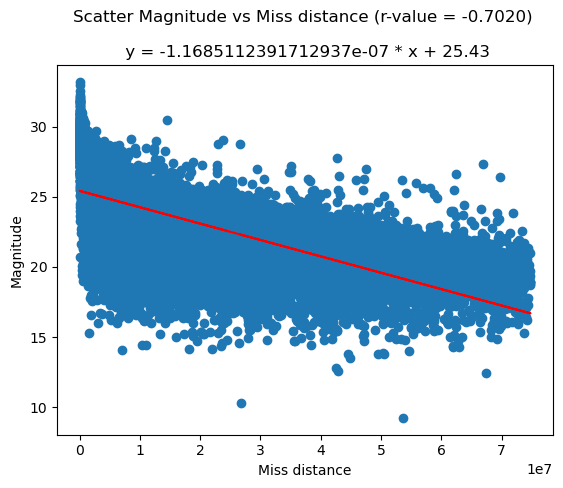

-1.1685112391712937e-07 25.430564301822937 -0.7020264998660326 0.0 7.158297166152405e-10


In [15]:
plt.scatter(unique_objects_df['miss_distance'], unique_objects_df['absolute_magnitude'])
slope, intercept, rvalue, pvalue, stderr = st.linregress(unique_objects_df['miss_distance'], unique_objects_df['absolute_magnitude'])
all_y = slope * unique_objects_df['miss_distance'] + intercept
plt.plot(unique_objects_df['miss_distance'], all_y, color = 'red')
plt.xlabel('Miss distance')
plt.ylabel('Magnitude')
plt.title(f'Scatter Magnitude vs Miss distance (r-value = {rvalue:.4f}) \n\n y = {slope} * x + {intercept:.2f}')
plt.show()
print(slope, intercept, rvalue, pvalue, stderr)

In [16]:
from scipy.stats import f_oneway
close_distance = unique_objects_df[unique_objects_df['miss_distance'] < 2500000 ]['absolute_magnitude']
intermediate_distance = unique_objects_df[(unique_objects_df['miss_distance'] >= 2500000) & (unique_objects_df['miss_distance'] < 5000000)]['absolute_magnitude']
far_distance = unique_objects_df[unique_objects_df['miss_distance'] >= 5000000]['absolute_magnitude']

anova_result = f_oneway(close_distance, intermediate_distance, far_distance)
print("ANOVA p-value:", anova_result.pvalue)

print(close_distance.mean())
print(intermediate_distance.mean())
print(far_distance.mean())

ANOVA p-value: 0.0
26.784145614035086
25.21687166859791
22.2277413322343


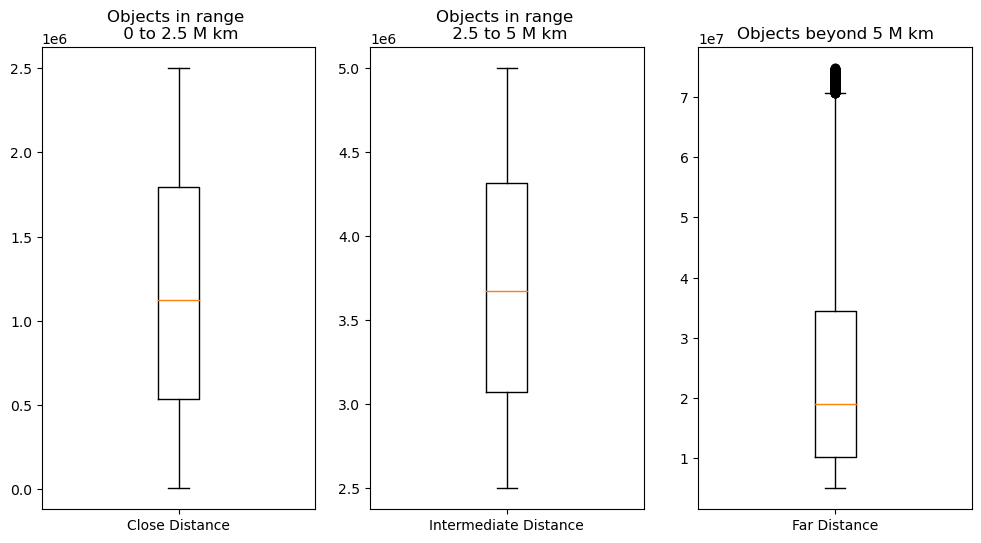

quartiles 0.25    7.644559e+06
0.50    1.393405e+07
0.75    2.557950e+07
Name: miss_distance, dtype: float64, lowq 7644558.972184909, uppq 25579496.560123168, mean 18804924.15253137, iqr 17934937.58793826, lowbound -19257847.40972248, uppbound 52481902.94203056, outlier 6       5.533405e+07
13      5.672439e+07
56      6.022397e+07
64      5.817413e+07
82      5.919289e+07
            ...     
2124    6.249434e+07
2145    5.317403e+07
2155    7.184552e+07
2157    6.032179e+07
2168    5.373928e+07
Name: miss_distance, Length: 98, dtype: float64


In [17]:
closest_all = hazardous_df['miss_distance']
closest_all

close_distance_bp = unique_objects_df[unique_objects_df['miss_distance'] < 2500000 ]
intermediate_distance_bp = unique_objects_df[(unique_objects_df['miss_distance'] >= 2500000) & (unique_objects_df['miss_distance'] < 5000000)]
far_distance_bp = unique_objects_df[unique_objects_df['miss_distance'] >= 5000000]

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))

ax1.boxplot(close_distance_bp['miss_distance'], labels = ['Close Distance'])
ax1.set_title('Objects in range \n 0 to 2.5 M km')
ax2.boxplot(intermediate_distance_bp['miss_distance'], labels = ['Intermediate Distance'])
ax2.set_title('Objects in range \n 2.5 to 5 M km')
ax3.boxplot(far_distance_bp['miss_distance'], labels = ['Far Distance'])
ax3.set_title('Objects beyond 5 M km')
plt.show()

quartiles = closest_all.quantile([0.25, 0.5, 0.75])
lowq = quartiles[0.25]
uppq = quartiles[0.75]
mean = closest_all.mean()
iqr = uppq - lowq
lowbound = lowq - (1.5 * iqr)
uppbound = uppq + (1.5 * iqr)
outlier = closest_all[(lowbound > closest_all) | (closest_all > uppbound)]
print(f'quartiles {quartiles}, lowq {lowq}, uppq {uppq}, mean {mean}, iqr {iqr}, lowbound {lowbound}, uppbound {uppbound}, outlier {outlier}')

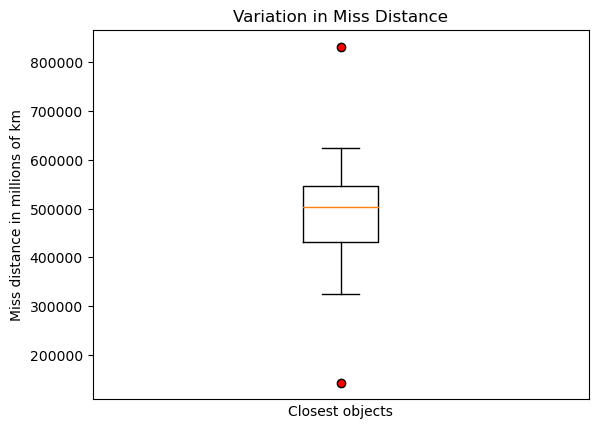

quartiles 0.25    432438.396508
0.50    502670.759288
0.75    547370.172750
Name: miss_distance, dtype: float64, lowq 432438.3965083205, uppq 547370.1727500787, mean 487586.53378773166, iqr 114931.7762417582, lowbound 260040.73214568323, uppbound 719767.837112716, outlier 1777    143272.707499
838     832144.928659
Name: miss_distance, dtype: float64


In [18]:
plt.boxplot(closest['miss_distance'], flierprops = dict(markerfacecolor = 'r'))
plt.xticks([])
plt.xlabel('Closest objects')
plt.ylabel('Miss distance in millions of km')
plt.title('Variation in Miss Distance')
plt.show()

quartiles = closest['miss_distance'].quantile([0.25, 0.5, 0.75])
lowq = quartiles[0.25]
uppq = quartiles[0.75]
mean = closest['miss_distance'].mean()
iqr = uppq - lowq
lowbound = lowq - (1.5 * iqr)
uppbound = uppq + (1.5 * iqr)
outlier = closest['miss_distance'].loc[(lowbound > closest['miss_distance']) | (closest['miss_distance']> uppbound)]
print(f'quartiles {quartiles}, lowq {lowq}, uppq {uppq}, mean {mean}, iqr {iqr}, lowbound {lowbound}, uppbound {uppbound}, outlier {outlier}')

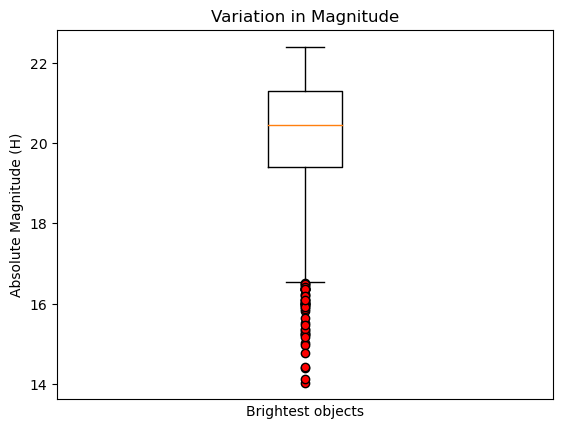

quartiles 0.25    19.40
0.50    20.45
0.75    21.30
Name: absolute_magnitude, dtype: float64, lowq 19.4, uppq 21.3, mean 20.199537505752417, iqr 1.9000000000000021, lowbound 16.549999999999997, uppbound 24.150000000000006, outlier 0      16.35
1      15.34
2      16.11
3      15.22
5      16.00
6      15.25
8      14.04
9      14.40
12     16.49
13     16.02
15     15.31
16     14.13
18     15.53
22     15.02
23     16.36
37     16.38
41     15.92
42     15.82
44     14.44
47     16.01
52     15.87
62     16.00
63     15.25
80     16.36
86     15.64
91     15.96
93     16.09
96     14.98
98     16.44
99     15.38
102    16.53
114    15.17
122    16.50
138    15.98
139    16.07
169    15.47
197    16.36
209    16.21
236    16.25
254    16.37
273    14.77
296    16.02
323    16.41
391    16.37
446    15.92
683    16.20
729    16.09
Name: absolute_magnitude, dtype: float64


In [19]:
brigthest_all = hazardous_df['absolute_magnitude']
brigthest_all


plt.boxplot(brigthest_all, flierprops = dict(markerfacecolor = 'r'))
plt.xticks([])
plt.xlabel('Brightest objects')
plt.ylabel('Absolute Magnitude (H)')
plt.title('Variation in Magnitude')
plt.show()

quartiles = brigthest_all.quantile([0.25, 0.5, 0.75])
lowq = quartiles[0.25]
uppq = quartiles[0.75]
mean = brigthest_all.mean()
iqr = uppq - lowq
lowbound = lowq - (1.5 * iqr)
uppbound = uppq + (1.5 * iqr)
outlier = brigthest_all[(lowbound > brigthest_all) | (brigthest_all > uppbound)]
print(f'quartiles {quartiles}, lowq {lowq}, uppq {uppq}, mean {mean}, iqr {iqr}, lowbound {lowbound}, uppbound {uppbound}, outlier {outlier}')


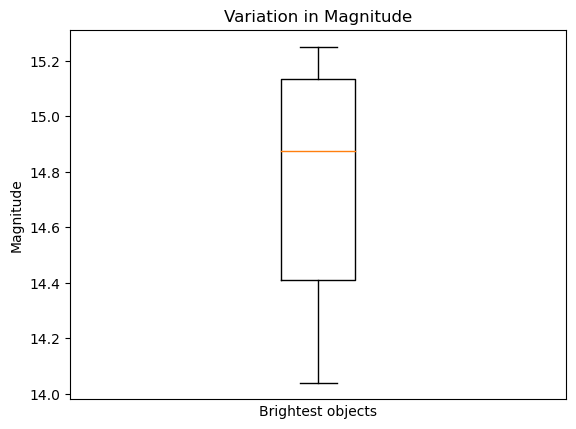

quartiles 0.25    14.4100
0.50    14.8750
0.75    15.1325
Name: absolute_magnitude, dtype: float64, lowq 14.41, uppq 15.1325, mean 20.441, iqr 0.7225000000000001, lowbound 13.32625, uppbound 16.216250000000002, outlier Series([], Name: absolute_magnitude, dtype: float64)


In [20]:
plt.boxplot(brigthest['absolute_magnitude'], flierprops = dict(markerfacecolor = 'r'))
plt.xticks([])
plt.xlabel('Brightest objects')
plt.ylabel('Magnitude')
plt.title('Variation in Magnitude')
plt.show()
quartiles = brigthest['absolute_magnitude'].quantile([0.25, 0.5, 0.75])
lowq = quartiles[0.25]
uppq = quartiles[0.75]
mean = closest['absolute_magnitude'].mean()
iqr = uppq - lowq
lowbound = lowq - (1.5 * iqr)
uppbound = uppq + (1.5 * iqr)
outlier = brigthest['absolute_magnitude'].loc[(lowbound > brigthest['absolute_magnitude']) | (brigthest['absolute_magnitude']> uppbound)]
print(f'quartiles {quartiles}, lowq {lowq}, uppq {uppq}, mean {mean}, iqr {iqr}, lowbound {lowbound}, uppbound {uppbound}, outlier {outlier}')

## Conclusions

Confirmation of the Null Hypothesis (H0): The analysis conducted on the dataset doesn't support our hypothesis. The data reveals an apparent negative correlation, meaning that as the magnitude (apparent size) of NEOs decreases, their miss distance increases. This finding aligns with the expectation that NEOs in closer proximity to Earth appear larger in the sky when observed from our vantage point, but the abundant presence of outliers in the data set contributes to the variance, and when we test smaller sections of the data set the apparent relationship is lost.

Identification of Potentially Hazardous Objects: Out of the entire dataset, 7.9% of the objects were identified as Potentially Hazardous Asteroids (PHAs) based on the criteria of a minimum orbit intersection distance (MOID) of 0.05 astronomical units (au) or less and an absolute magnitude (H) of 22.0 or less. This highlights the importance of continued monitoring and tracking of these objects to assess potential threats.

Magnitude and Distance Relationships: Further analysis reveals that 38.6% of hazardous objects are within the specified distance range, emphasizing the significance of monitoring NEOs within this proximity. Additionally, 32.7% of hazardous objects exhibit a magnitude below the hazardous threshold, emphasizing the importance of considering both the distance and apparent size when categorizing PHAs.

Regression Analysis:
The negative correlation observed in the regression analysis indicates that NEOs with smaller apparent sizes tend to have closer miss distances to Earth. The calculated r-value of -0.7020 of this correlation, suggests an apparent inverse relationship between magnitude and miss distance, however, we have observed this correlation at the scale of the full population, when we test a smaller dataset the relationship is lost.

We executed a statistical analysis using additional data like velocity and diameters of the NEOs, we performed de calculation of the mean, median, variance, sem, and ANOVA tests. None of that analysis brings additional statistically significant information for instance the standard deviation is too high, miss distance std:1.724212e+07, magnitude std: 2.869921, so we kept the regression analysis.

Variance and Trends:
The high variance observed in the box plots suggests a wide range of miss distances for NEOs with similar apparent sizes. This variability could explain the observed trend in the regression analysis despite the r-value being 0.7020, indicating an apparent relationship, but the presence of outliers particularly in the farthest objects contributes to the high variance in the data set. Analyzing the data separately helps us observe that the apparent relationship is not maintained through the entire data set, so we confirm the Null hypothesis.